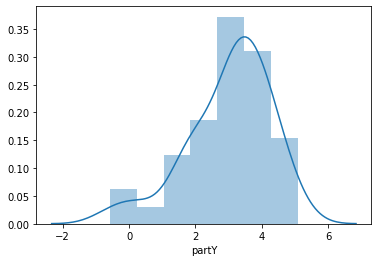

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats as sst

#Don't include in script.
bs_data = pd.read_csv('brainsize.csv', sep = ';', index_col=0, na_values = '.')

# Add column of random noise
np.random.seed(931)
#bs_data['partY'] = sst.norm(0,1,bs_data.shape[0])
bs_data['partY'] = np.log(np.random.exponential(30,bs_data.shape[0], ))
#bs_data['partY'] = np.random.normal(0,1,bs_data.shape[0]) + np.random.exponential(300,bs_data.shape[0])
#bs_data['partY'] = np.random.binomial(2, 0.66, bs_data.shape[0])
#bs_data
sns.distplot(bs_data['partY'])


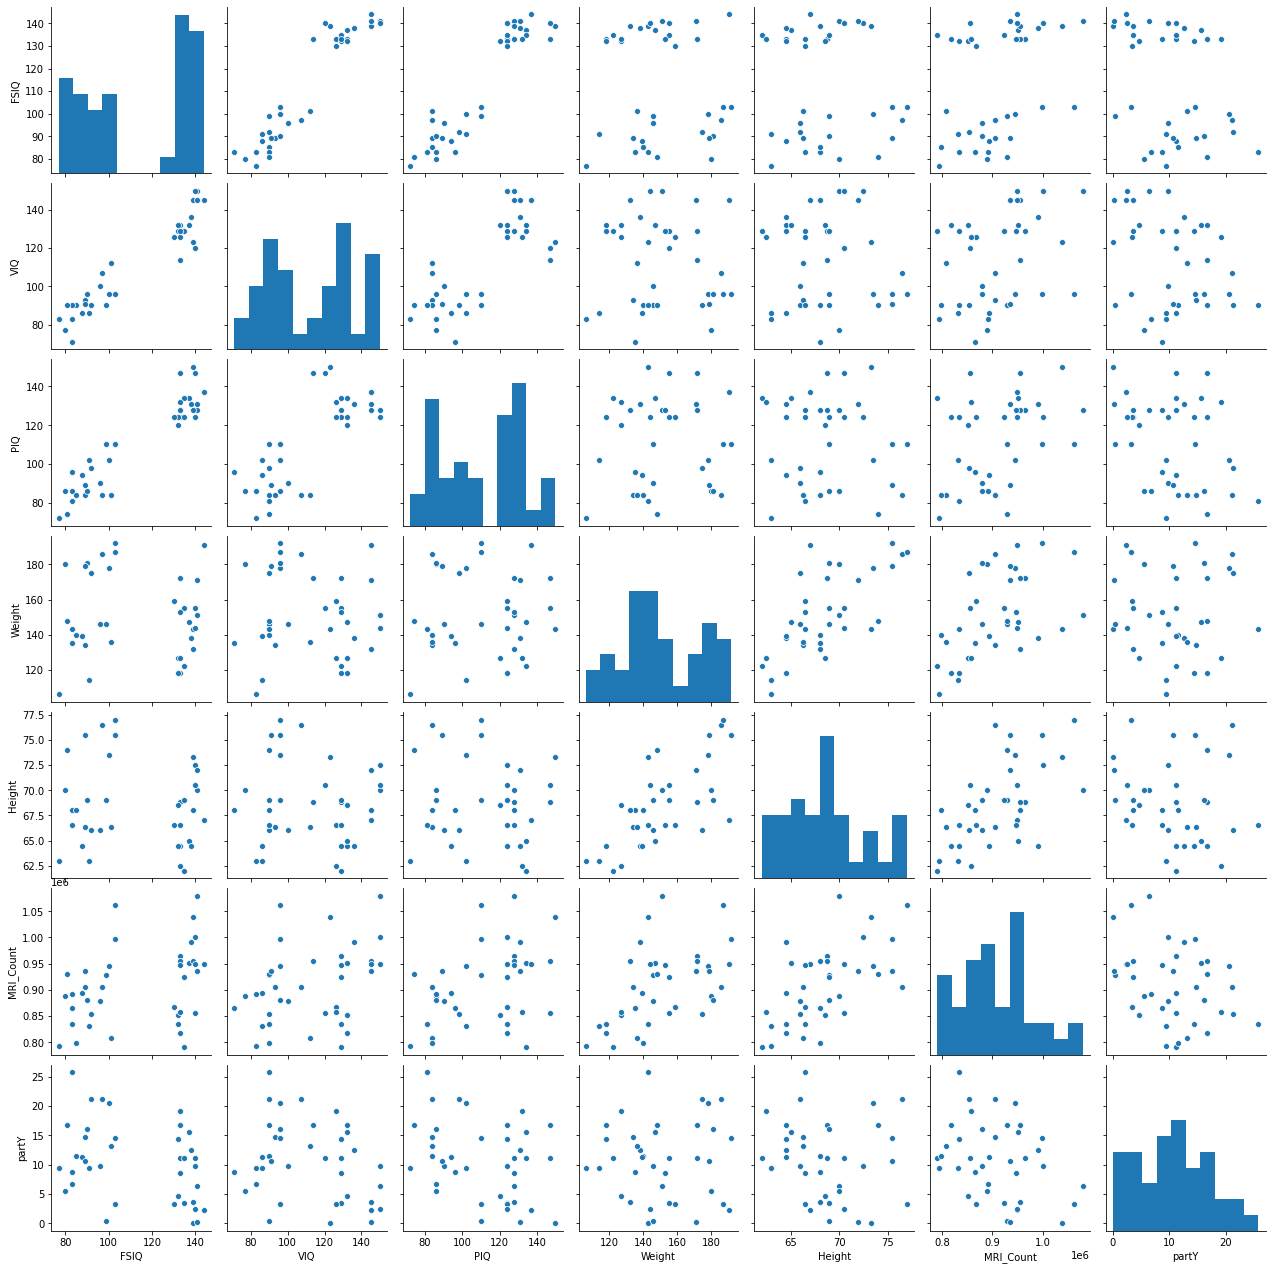

In [45]:
#sns.pairplot(bs_data, hue='Gender')
sns.pairplot(bs_data, diag_kind='hist')

In [95]:
model = dict()
for idx, feature in enumerate(bs_data.columns[range(1,bs_data.columns.shape[0]-1)]):
    model[feature] = ols('partY ~ ' + feature, bs_data).fit()
    
for mod in model:
    print(mod)


FSIQ
VIQ
PIQ
Weight
Height
MRI_Count


In [52]:
model = ols('partY ~ MRI_Count', bs_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     5.175
Date:                Sat, 30 May 2020   Prob (F-statistic):             0.0286
Time:                        18:45:26   Log-Likelihood:                -62.821
No. Observations:                  40   AIC:                             129.6
Df Residuals:                      38   BIC:                             133.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4767      2.411      3.516      0.0

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
count,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,38.000000
mean,113.552632,112.131579,111.342105,151.052632,68.421053,9.067542e+05,10.714588
std,23.815391,22.939605,22.597867,23.478509,3.993790,7.256175e+04,6.589319
min,77.000000,71.000000,72.000000,106.000000,62.000000,7.906190e+05,0.001245
25%,90.250000,90.250000,89.250000,135.250000,66.000000,8.548115e+05,4.817831
50%,116.500000,113.000000,115.000000,146.500000,68.000000,9.053990e+05,11.163575
75%,135.000000,129.000000,128.000000,172.000000,70.375000,9.495405e+05,15.321919
max,144.000000,150.000000,150.000000,192.000000,77.000000,1.079549e+06,25.756459


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb939b60da0>,
      dtype=object)

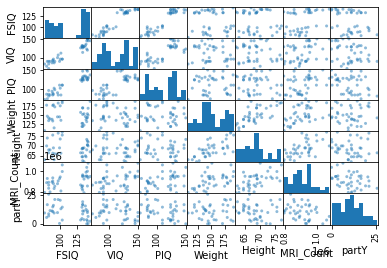

In [36]:
pd.plotting.scatter_matrix(bs_data)

In [42]:
sst.norm(0,1).isf(0.05)

1.6448536269514729